<a href="https://colab.research.google.com/github/SvanaBirgis/Reiknifraedi/blob/main/Skilaverkefni/S4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stærðfræði og reiknifræði vor 2022, skiladæmi 4

Nafn: Svana Björg Birgisdóttir

Samverkamenn:

# Verkefni 10 - Skrá með íslenskum orðum 

Þetta verkefni er lauslega byggt á verkefnum í 9. kafla Think Python kennslubókarinnar. Í skrá með veffang https://cs.hi.is/python/ord.txt eru 217 þúsund íslensk orð. Þið getið skoðað skrána með því að smella á hlekkinn. Í verkefninu sem hér fylgir þarf að nota ýmsar strengjaaðgerðir sem lýst er í kafla 5.2.

1. Opnið skrána með urlopen og lesið hana inn eins og sýnt er í kafla 8.2.4. Prentið út fyrstu 5 orðin og líka tíu þúsundasta hvert orð og öll orð sem eru lengri en 30 stafir.

2. Spegilorð (palindrome) er orð sem er eins lesið afturábak og áfram (t.d. kajak). Skrifið rökfall spegilorð(s) sem kannar hvort s sé spegilorð [rökfall er fall sem skilar True eða False og prófið. Skrifið í framhaldi út öll spegilorð í skránni, 10 á hverja línu. Fyrsta linan ætti að verða:

  abba, afa, aga, agga, aka, ala, alla, ama, amma, ana,

3. Finnið þau orð í skránni sem hafa einn sérhljóða og hámarksfjölda samhljóða.



In [ ]:
#V10a
from urllib.request import urlopen
f = urlopen("https://cs.hi.is/python/ord.txt")
ordin = []

for lína in f:
  ord = lína.decode().split()
  ordin.append(ord[0])

for i in ordin[:5]:
  print(i, end = ", ")

print()

for j in ordin[::10000]:
  print(j, end = ", ")

print()

for k in [x for x in ordin if len(x)>30]:
  print(k, end = ", ")




abba, abbadís, abbadísar, abbadísarinnar, abbadísartíð, 
abba, barónett, bókmenntahátíðinni, eldvarpi, flögraði, galdrakver, hafnarverkamaður, hnýttan, illkvittnislegar, konunglegar, leiðbeiningum, margnefndir, nemanna, rammann, sandhólunum, skynsemdar, stjórnast, sólarhring, tötralegur, veðurs, árásargrein, útdauðir, 
alþjóðaheilbrigðisstofnunarinnar, alþjóðasiglingamálastofnunarinnar, atvinnuleysistryggingasjóðurinn, flugslysarannsóknarnefndarinnar, norðuratlantshafssjávarspendýraráðsins, norðurheimskautsrannsóknaráðsins, teiknimyndaævintýrapoppálfkonan, 

In [ ]:
#V10b
def spegilorð(s):
  revS = s[::-1]
  return revS == s

spegil = [x for x in ordin if spegilorð(x)]

for i in range(len(spegil)):
  if i % 10 == 0 and i != 0:
    print("\n")
  print(spegil[i], end = ", ")
  

abba, afa, aga, agga, aka, ala, alla, ama, amma, ana, 

apa, argra, assa, ata, axa, aða, gíg, gýg, illi, inni, 

iðaði, iði, kajak, kok, kák, kæk, kók, kúk, mm, muninum, 

munnum, munum, mununum, mussum, natan, nón, píp, rabbar, radar, raddar, 

rafar, ragar, rakar, rakkar, rammar, rappar, rasar, rassar, ratar, raðar, 

rifir, riðir, ruddur, rullur, rumur, runur, rár, rær, rór, rör, 

rýr, sinnis, stúts, summus, sás, talat, tillit, tæt, uku, ullu, 

undnu, unnu, unu, uxu, á, æ, í, ísí, ó, óbó, 

ódó, óró, ý, 

In [ ]:
#V10c
vowels = "aáeéiíoóuúyýæöAÁEÉIÍOÓUÚYÝÆÖ"

def isVowel(a):
  return a in vowels

def specific(word, noCons):
  countVow=0
  countCons=0

  for char in word:
    if (isVowel(char)):
      countVow+=1
    else:
      countCons+=1
  
  return (countVow==1) and (countCons==noCons)

def findMaxCons():
  noCons = 1
  candidate = [x for x in ordin if specific(x, noCons)]
  while(candidate):
    noCons+=1
    candidate = [x for x in ordin if specific(x, noCons)]
  
  noCons-=1
  return noCons

maxCons = findMaxCons()

specific = [x for x in ordin if specific(x, maxCons)]

for i in specific:
  print(i, end = ", ")




bhmfólks, skrappst, skyggnst, strengst, 

# Verkefni 11a - Fjöldi stafa í skrafli 
Í þessu verkefni á að búa til töflu yfir hlutfallslega tíðni hvers stafs í skránni ord.txt úr verkefni 10, og jafnframt hvað sú tíðni samsvarar mörgum heilum stöfum af 98, sem er heildarfjöldi stafa í pokanum sem notaður er í borðspilinu skrafli (scrabble). Taflan ætti að byrja svona:

    stafur  tíðni  fjöldi
    –––––––––––––––––––––
      a     9.80%    10
      á     1.27%     1
      b     1.34%     1

In [ ]:
#V11a
from urllib.request import urlopen
f = urlopen("https://cs.hi.is/python/ord.txt")

print(f'Stafur   Tíðni   Fjöldi')
print(f'–––––––––––––––––––––––')

L = []
allarlínur =  []

for lína in f:
  ord = lína.decode().split()
  allarlínur.append(ord[0])

öllord = "".join(allarlínur)

n = len(öllord)

# skilar "tíðni" í %
def freq(a):
  return öllord.count(a)/n*100

# skilar "fjöldi"
def scrabbleFreq(a):
  ta = öllord.count(a)/n
  return round(ta*98)

# fyrir hvern staf í stafrófinu prenta scrabbleFreq af stafnum
stafróf = "aábcdðeéfghiíjklmnoópqrstuúvwxyýzþæö"
for i in range(len(stafróf)):
  stafur = stafróf[i]
  print(f'  {stafur}      {freq(stafur):.2f}%    {scrabbleFreq(stafur)}')


Stafur   Tíðni   Fjöldi
–––––––––––––––––––––––
  a      9.80%    10
  á      1.27%    1
  b      1.34%    1
  c      0.00%    0
  d      2.02%    2
  ð      3.41%    3
  e      4.12%    4
  é      0.30%    0
  f      2.96%    3
  g      4.01%    4
  h      1.59%    2
  i      7.60%    7
  í      0.90%    1
  j      1.47%    1
  k      3.75%    4
  l      5.74%    6
  m      3.55%    3
  n      9.44%    9
  o      1.20%    1
  ó      1.51%    1
  p      1.15%    1
  q      0.00%    0
  r      9.03%    9
  s      6.57%    6
  t      5.11%    5
  u      5.83%    6
  ú      0.67%    1
  v      1.70%    2
  w      0.00%    0
  x      0.06%    0
  y      0.98%    1
  ý      0.32%    0
  z      0.00%    0
  þ      0.42%    0
  æ      1.06%    1
  ö      1.12%    1


# Verkefni 17 - Fallateikning
1. Skrifið forrit sem reiknar fallsgildi fallsins:

    𝑓(𝑥)=(𝑥+3)(𝑥+2)𝑥(𝑥−2)(𝑥−3)

  Prófið t.d. að reikna f(1) (á að gefa 24)

2. Búið til vandaða teikningu af fallinu á bilinu [−3.4,3.4] sbr. kafla 9.6. Notið linspace fallið og stikana/föllin xlim, ylim, xticks, yticks, linewidth, color, axvline, axhline, grid, box og tick_params með hæfilegum viðföngum.

In [ ]:
#V17a
import math
def f(x):
    return (x+3)*(x+2)*x*(x-2)*(x-3)


y = f(1)
print(y)



24


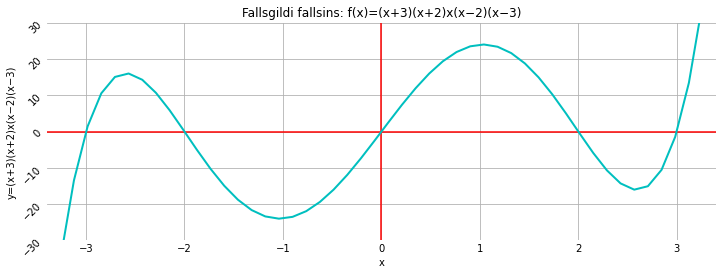

In [ ]:
from numpy.core.function_base import linspace
#V17b
#Frumstilling teikningar
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
plt.rc('figure', figsize=(8,4)) # (6,4) er sjálfgefið
plt.rc('savefig',bbox='tight')  # laga galla á savefig


def f(x):
    return (x+3)*(x+2)*x*(x-2)*(x-3)

plt.figure(figsize=(12,4))
plt.grid(True)
plt.box(False)
plt.axvline(c='r')
plt.axhline(c='r')
x = linspace(-3.4, 3.4)
y = [f(i) for i in x]
plt.xlim(-3.4,3.4)
plt.ylim(-30, 30)
plt.tick_params(length=0)
plt.title('Fallsgildi fallsins: f(x)=(x+3)(x+2)x(x−2)(x−3)')
plt.xlabel('x')
plt.ylabel('y=(x+3)(x+2)x(x−2)(x−3)')
plt.xticks(rotation=0)
plt.yticks(rotation=45)
plt.plot(x, y, c='c', lw=2);
plt.show()